In [1]:
import pandas as pd

data = pd.read_csv("data/CC GENERAL.csv")

In [2]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.drop(columns=["CUST_ID", "TENURE"], inplace=True)

In [4]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [5]:
missing = data.isna().sum()

In [6]:
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [7]:
data = data.fillna(data.median())

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [9]:
values = Normalizer().fit_transform(data.values)

In [10]:
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [13]:
y_pred

array([1, 4, 1, ..., 1, 1, 3], dtype=int32)

In [14]:
labels= kmeans.labels_

In [15]:
from sklearn import metrics

In [16]:
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')

In [17]:
silhouette

0.3645055324417282

In [18]:
dbs = metrics.davies_bouldin_score(values, labels)

In [19]:
dbs

1.0756856623533981

In [20]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.800717231778


In [21]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=3, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    
    return s, dbs, calinski
    

In [22]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.32723842483666854 1.3083644907821868 3526.450317815443


In [23]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3485292820452357 1.1527134855876944 3422.838208337746


In [24]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3166473714134107 1.1298126937646775 2997.9016678624726


In [25]:
import numpy as np

random_data = np.random.rand(8950, 16)

In [26]:
sR, dbsR, calinskiR = clustering_algorithm(5, random_data)
print(sR, dbsR, calinskiR)

0.03952366108731032 3.5383971699356174 303.4825886986745


In [27]:
print(s2, dbs2, calinski2)
print(sR, dbsR, calinskiR)

0.3485292820452357 1.1527134855876944 3422.838208337746
0.03952366108731032 3.5383971699356174 303.4825886986745


In [28]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.2963615752653885 1.3639906753592896 1030.9560076503842
0.35406999696241026 1.1389554530299946 1194.945411949724
0.3670355256183802 1.0993767580167497 1167.5313828364538


In [29]:
import matplotlib.pyplot as plt

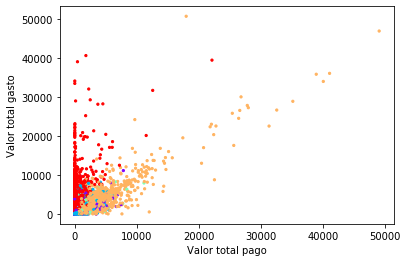

In [30]:
plt.scatter(data["PURCHASES"], data["PAYMENTS"], c=labels, s=5, cmap="rainbow")
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

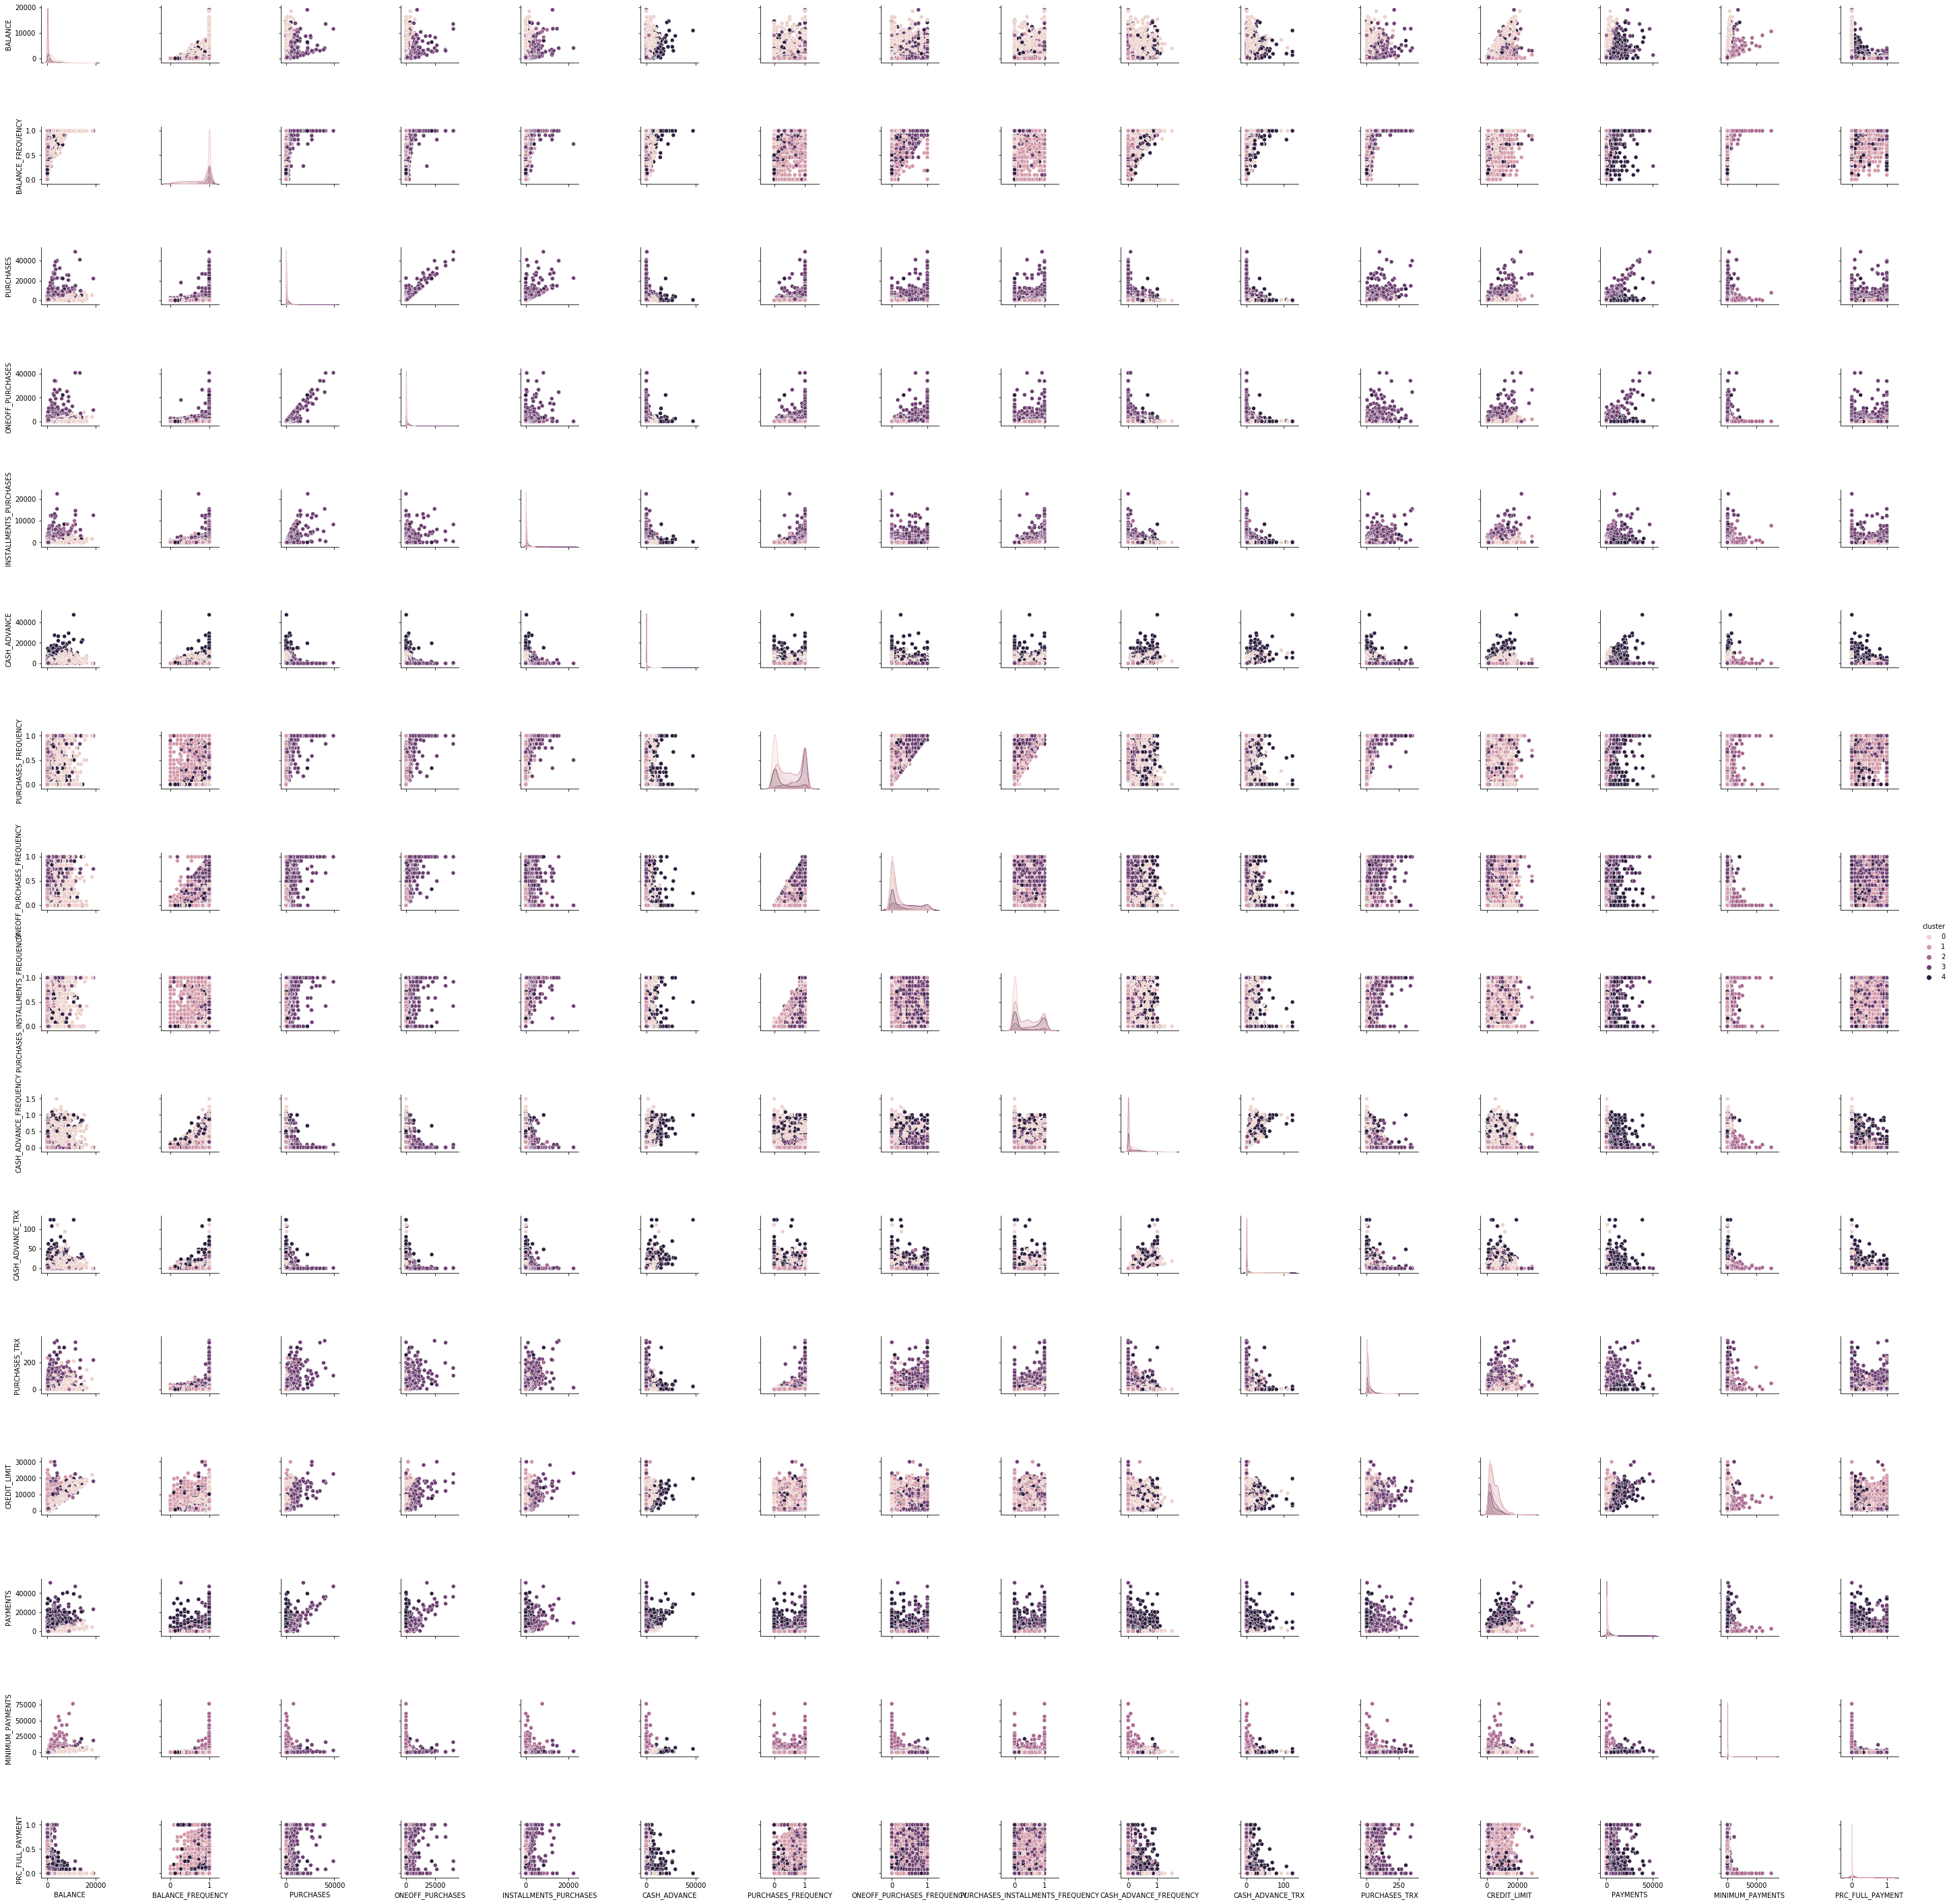

In [31]:
import seaborn as sns
data["cluster"] = labels

sns.pairplot(data[0:], hue="cluster")

In [34]:
data.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2648.0  3038.132314  2479.290949   6.824905  1256.126442   
1        3280.0   443.746756   846.398201   0.000000    23.365333   
2         411.0  1987.501586  1854.459156  70.794108  1018.958891   
3        1539.0  1144.165942  1664.223404   0.000000   212.743922   
4        1072.0  1794.637544  1983.094646   0.000000   506.925348   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2173.994774  4224.605542  18495.558550            2648.0  0.963768   
1          82.941478   410.126094   9630.367575            3280.0  0.774389   
2        1337.287314  2138.678431  11670.179850             411.0  0.989486   
3         556.359504  1372.605793  19043.138560            1539.0  0.928301   
4        1087.920500  2316.353276  14581.459140            1072.0  0.862113   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.437428   8345.641905           2648.0  0.001800   
1        ...       248.733727   4483.503862           3280.0  0.246806   
2        ...      7112.618584  76406.207520            411.0  0.019318   
3        ...       525.257953  18621.013310           1539.0  0.277969   
4        ...       886.834603  21235.065300           1072.0  0.117280   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023264  0.0  0.0  0.000000  0.000000  0.6  
1        0.346748  0.0  0.0  0.000000  0.444444  1.0  
2        0.090901  0.0  0.0  0.000000  0.000000  1.0  
3        0.366883  0.0  0.0  0.083333  0.545455  1.0  
4        0.186888  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [35]:
centroids = kmeans.cluster_centers_

In [36]:
centroids

array([[5.04294070e-01, 2.72242076e-04, 6.17554553e-02, 3.62405829e-02,
        2.55365937e-02, 2.52765717e-01, 6.72943541e-05, 2.57072238e-05,
        4.50409323e-05, 5.74261583e-05, 1.15669149e-03, 1.33139220e-03,
        7.19260678e-01, 1.66160406e-01, 1.79203910e-01, 5.52512128e-07],
       [6.91011876e-02, 2.30698617e-04, 1.21431709e-01, 4.79816606e-02,
        7.35503074e-02, 2.43384856e-02, 1.72769885e-04, 3.36789398e-05,
        1.40239766e-04, 7.92583409e-06, 1.24000113e-04, 2.86240957e-03,
        9.43606691e-01, 1.53769633e-01, 5.68320400e-02, 7.61141861e-05],
       [3.32918803e-01, 2.68423552e-04, 1.58240376e-01, 3.63059801e-02,
        1.22319068e-01, 5.83557153e-02, 1.66754597e-04, 2.64938445e-05,
        1.47063187e-04, 1.93217566e-05, 4.27934836e-04, 3.86197017e-03,
        3.76718873e-01, 2.51861450e-01, 6.80311114e-01, 4.23993819e-06],
       [1.59935040e-01, 2.45247256e-04, 4.38341920e-01, 2.56871707e-01,
        1.81641613e-01, 2.60066385e-02, 2.04384627e-04, 8.892

In [47]:
_max = len(centroids[0])

for i in range(_max):
    print(data.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [113]:
description = data.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]].describe()

In [115]:
description_df = description.mean()
description_df
# description["mean"]

BALANCE       count     1790.000000
              mean      1681.636828
              std       1765.493271
              min         15.523803
              25%        603.623987
              50%       1047.700714
              75%       2092.473827
              max      14684.140735
PURCHASES     count     1790.000000
              mean      1122.849831
              std       1604.887273
              min         20.196000
              25%        286.447000
              50%        621.556000
              75%       1337.564500
              max      19304.018000
CASH_ADVANCE  count     1790.000000
              mean      1130.881638
              std       1614.691748
              min          0.000000
              25%        211.372843
              50%        591.744388
              75%       1408.801152
              max      17098.362693
CREDIT_LIMIT  count     1790.000000
              mean      3986.208091
              std       3287.815795
              min        180

In [75]:
# n_clients = description.size

In [79]:
# decription["n_clients"] = n_clients

# Teste com exercicio do livro

In [123]:
x = np.c_[data["PURCHASES"].values]
x = np.c_[data["PAYMENTS"].values]

In [125]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
X_new = [[2500]]

In [133]:
model.predict(X_new)

array([2500.])